In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.model_selection import train_test_split

import tensorflow as tf


In [131]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()


# print(breast_cancer_data)


In [158]:
# 1. Load the breast cancer dataset
# Load it with as_frame=True to get a Pandas DataFrame directly
cancer = sklearn.datasets.load_breast_cancer(as_frame=True)

# 'cancer' is a Bunch object (like a dictionary).
# It contains 'data' (the features) and 'target' (the labels).

# 2. Access the DataFrame
# The features are in cancer.data
# The target is in cancer.target
# You might want to combine them into a single DataFrame for the CSV.

# Combine features and target into one DataFrame
df_cancer = pd.concat([cancer.data, cancer.target], axis=1)

# 3. Rename the target column for clarity (it's named 'target' by default)
# You can also use cancer.target_names to map the numerical target to actual names if desired
# For example, 0 is 'malignant', 1 is 'benign'
df_cancer = df_cancer.rename(columns={"target": "diagnosis"})

# 4. Save the DataFrame to a CSV file
# index=False prevents Pandas from writing the DataFrame index as a column in the CSV
df_cancer.to_csv("breast_cancer_dataset.csv", index=False)


NameError: name 'output_csv_file' is not defined

In [132]:
data = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

data.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [133]:
data["label"] = breast_cancer_data.target


data.tail(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,1
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,1
561,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,1
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,0
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,1


In [134]:
data.info()

breast_cancer_data.DESCR


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

'.. _breast_cancer_dataset:\n\nBreast cancer Wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [135]:
data["label"].value_counts()


# 1 - benign
# 0 - malignant


label
1    357
0    212
Name: count, dtype: int64

In [136]:
data.groupby("label").mean()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [137]:
# X = data.drop(["label"], axis=1)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.1,
)

print(X.shape, X_train.shape, X_test.shape)


(569, 30) (512, 30) (57, 30)


In [138]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
# X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [162]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense

# print(tf.config.list_physical_devices("GPU"))

tf.random.set_seed(3)

# v1
# model = keras.Sequential(
#     [
#         keras.layers.Input(shape=(30,)),
#         keras.layers.Flatten(),
#         keras.layers.Dense(20, activation="relu"),
#         # # keras.layers.Dense(30, activation="relu"),
#         keras.layers.Dense(1, activation="sigmoid"),
#     ]
# )


# v2 works
# model = keras.Sequential(
#     [
#         keras.layers.Input(shape=(30,)),
#         keras.layers.Flatten(),
#         keras.layers.Dense(20, activation="relu"),
#         keras.layers.Dense(10, activation="relu"),
#         keras.layers.Dense(1, activation="sigmoid"),
#     ]
# )


model = Sequential()
model.add(Input(shape=(30,)))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
# model.add(Dense(128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))


model.compile(
    optimizer="adagrad",
    loss="binary_crossentropy",
    # loss="sparse_categorical_crossentropy",
    metrics=[
        "accuracy",
        # "recall",
    ],
)

#
# model.summary()
# X_train.shape


history = model.fit(X_train, y_train, validation_split=0.1, epochs=20)


ValueError: Could not interpret optimizer identifier: ['adam', 'adagrad']

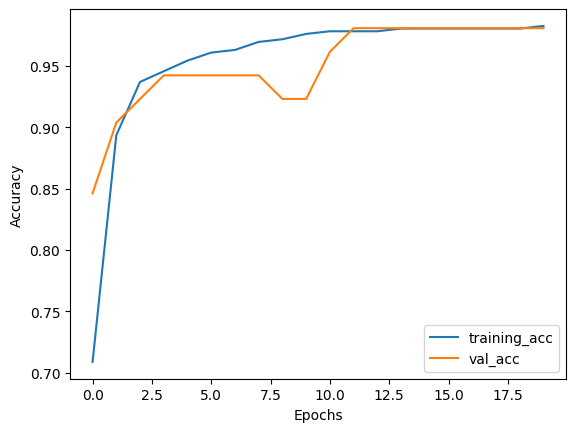

In [140]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
# plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])


# pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training_acc", "val_acc"])
plt.show()


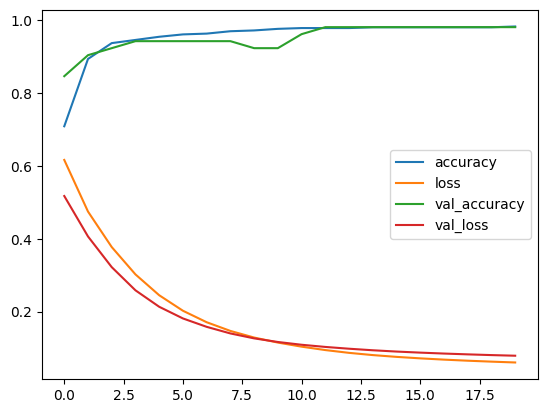

In [141]:
pd.DataFrame(history.history).plot()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9779 - loss: 0.0821
0.9824561476707458


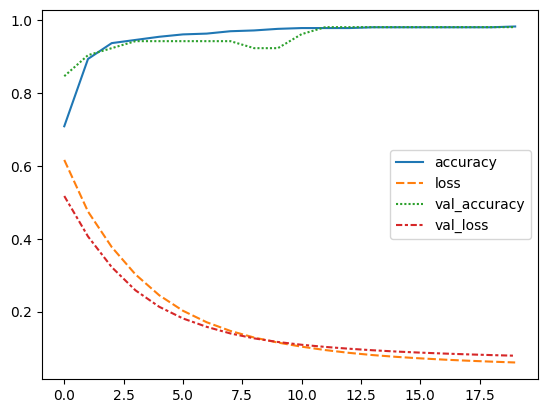

In [142]:
loss, accuracy = model.evaluate(X_test, y_test)


import seaborn as sns


sns.lineplot(pd.DataFrame(history.history))
print(accuracy)


In [143]:
print(X_test.shape)
print(X_test[0])


(57, 30)
[-0.48092952 -0.16187686 -0.45865539 -0.49905402  0.25723688  0.0220076
 -0.12393856 -0.28044732  0.42086592  0.13486288 -0.03867451 -0.31021735
 -0.18790116 -0.22468371 -0.01960013 -0.3603049  -0.17879412 -0.24555245
 -0.32106716 -0.08344697 -0.28065388 -0.1811395  -0.34709117 -0.36486337
  0.4481575  -0.11863689 -0.04666513 -0.2146561   0.1683625   0.18209015]


In [144]:
# import joblib
#
#
# joblib.dump(model, "breast_cancer_predictor.h5")
# joblib.dump(model, "breast_cancer_predictor.joblib")
# joblib.dump(model, "breast_cancer_predictor.keras")


In [147]:
y_pred = model.predict(X_test)


y_pred[:9]

X_test.shape
y_pred.shape
y_pred[0]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([0.9151474], dtype=float32)

[[9.15147424e-01]
 [2.28807121e-03]
 [1.65786333e-02]
 [9.89316761e-01]
 [9.97442603e-01]
 [1.32788401e-07]
 [1.12147700e-05]
 [1.18146800e-01]
 [5.58264315e-01]
 [9.97795939e-01]
 [9.15682852e-01]
 [5.41145615e-02]
 [9.87365484e-01]
 [2.53154129e-01]
 [9.98335660e-01]
 [6.99395640e-03]
 [9.93556678e-01]
 [9.99342620e-01]
 [9.99958992e-01]
 [2.33317958e-04]
 [8.51052821e-01]
 [9.81877327e-01]
 [4.57488341e-06]
 [9.99433219e-01]
 [9.96759713e-01]
 [9.87807691e-01]
 [9.97056484e-01]
 [9.71151352e-01]
 [9.91146505e-01]
 [1.11829642e-04]
 [9.97184336e-01]
 [9.99143124e-01]
 [9.86667454e-01]
 [9.90415931e-01]
 [9.98854041e-01]
 [9.95942414e-01]
 [1.41906977e-01]
 [9.97517109e-01]
 [2.07796833e-03]
 [8.82801890e-01]
 [9.98742402e-01]
 [1.23321675e-02]
 [9.93454754e-01]
 [9.95785892e-01]
 [9.65937614e-01]
 [9.49766457e-01]
 [9.97741461e-01]
 [9.97971833e-01]
 [9.65710878e-01]
 [9.96939063e-01]
 [1.85883918e-03]
 [3.23730164e-05]
 [7.35756755e-01]
 [9.65258181e-01]
 [9.98549402e-01]
 [9.882430

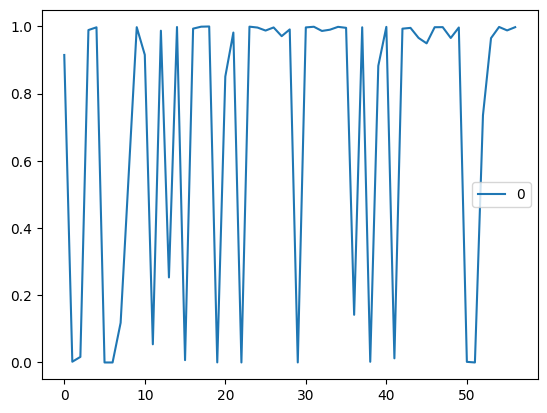

In [146]:
sns.lineplot(y_pred)
print(y_pred)


In [161]:
input_data = (
    13.05,
    19.31,
    82.61,
    527.2,
    0.0806,
    0.03789,
    0.000692,
    0.004167,
    0.1819,
    0.05501,
    0.404,
    1.214,
    2.595,
    32.96,
    0.007491,
    0.008593,
    0.000692,
    0.004167,
    0.0219,
    0.00299,
    14.23,
    22.25,
    90.24,
    624.1,
    0.1021,
    0.06191,
    0.001845,
    0.01111,
    0.2439,
    0.06289,
    # 1,
)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1, -1)

input_data = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data)
print(prediction)

prediction_label = (prediction > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.99728894]]


/home/mrmauler/DRIVE/projects/dl/breast_cancer/breast_cancer_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [156]:
y_predi = y_pred.astype(int)
y_predo = (y_pred > 0.5).astype(int)

# print(y_predi)
# print(y_predo)

print(pd.concat([pd.DataFrame(y_predi), pd.DataFrame(y_predo)], axis=1))


# pd.DataFrame(
#     y_predi
# ).
# join(pd.DataFrame(y_predo))


    0  0
0   1  1
1   0  0
2   0  0
3   1  1
4   1  1
5   0  0
6   0  0
7   0  0
8   1  1
9   1  1
10  1  1
11  0  0
12  1  1
13  0  0
14  1  1
15  0  0
16  1  1
17  1  1
18  1  1
19  0  0
20  1  1
21  1  1
22  0  0
23  1  1
24  1  1
25  1  1
26  1  1
27  1  1
28  1  1
29  0  0
30  1  1
31  1  1
32  1  1
33  1  1
34  1  1
35  1  1
36  0  0
37  1  1
38  0  0
39  1  1
40  1  1
41  0  0
42  1  1
43  1  1
44  1  1
45  1  1
46  1  1
47  1  1
48  1  1
49  1  1
50  0  0
51  0  0
52  1  1
53  1  1
54  1  1
55  1  1
56  1  1
